In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

# 도표 분석

In [2]:
with open('dk_api.txt', 'r') as f:
    dk_api=f.read().split('\n')

In [3]:
# dk_api

In [4]:
short_dk_api = [i[:70] for i in dk_api]

In [5]:
# short_dk_api

In [6]:
years = list(range(2014,2022))

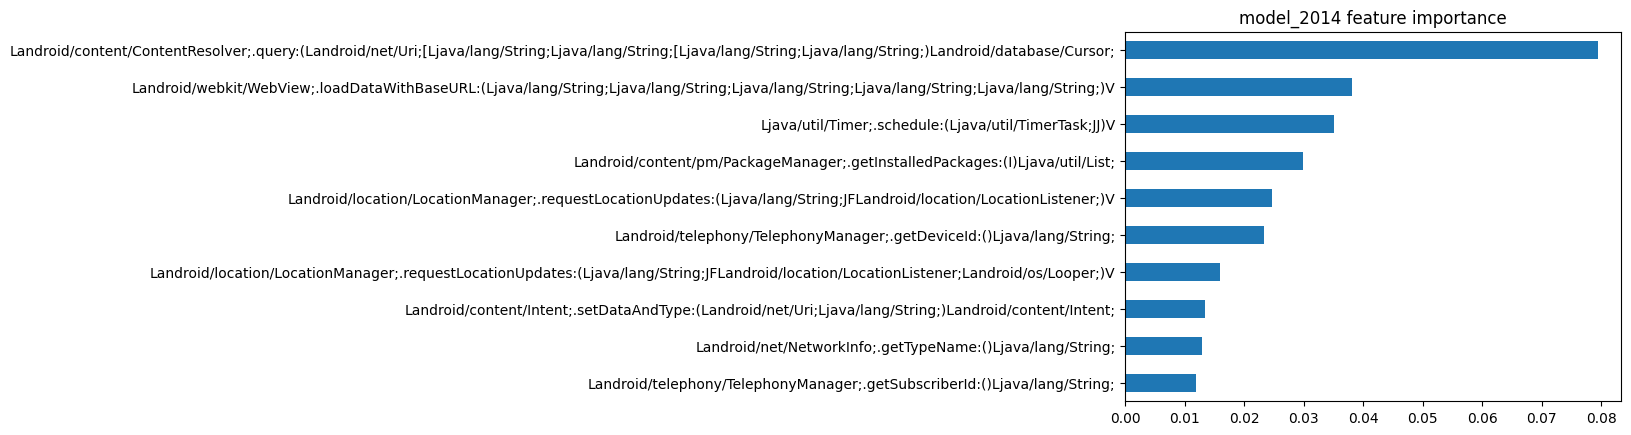

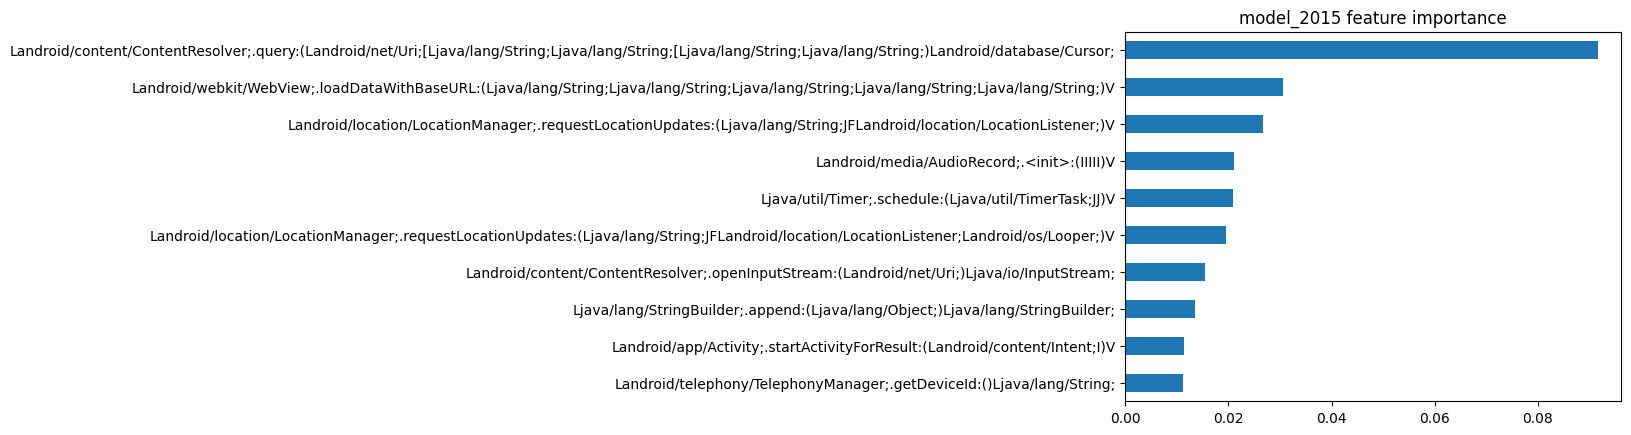

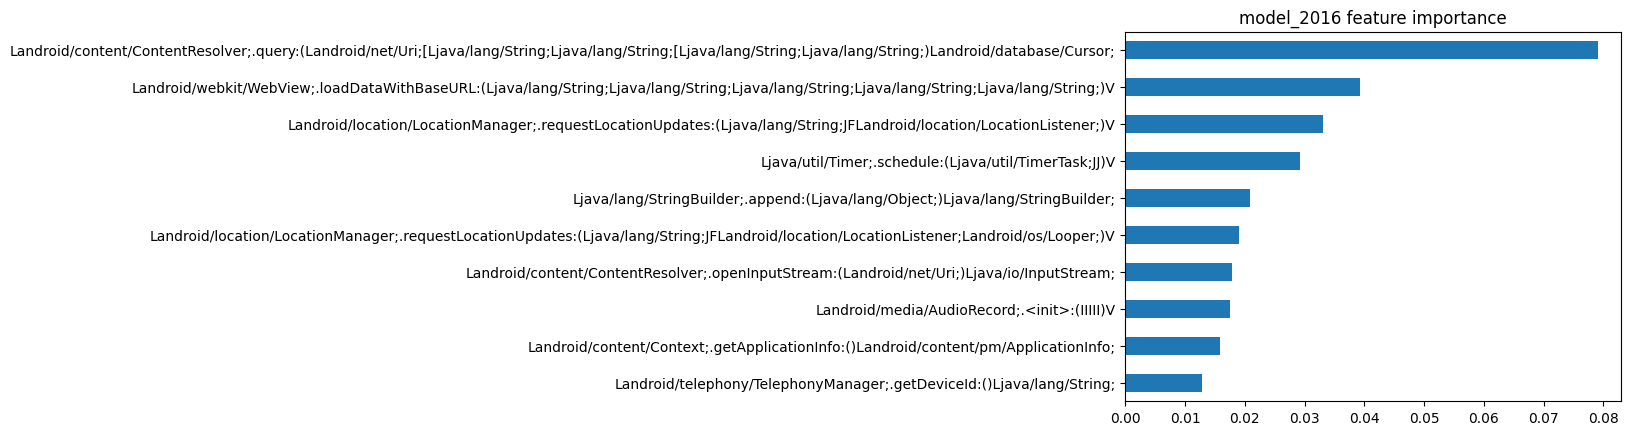

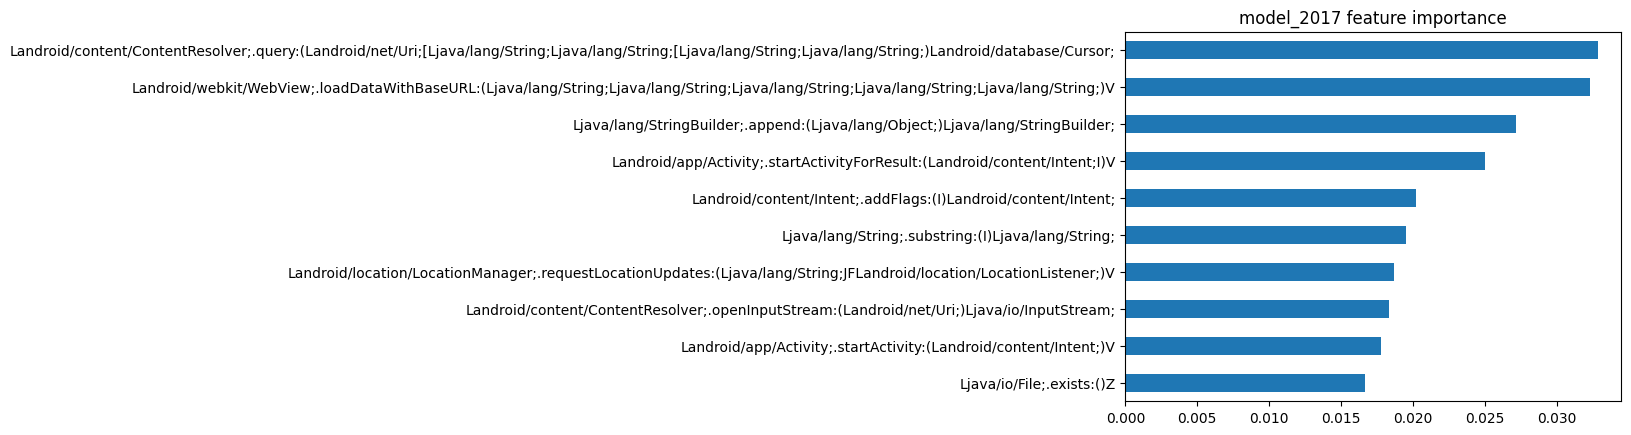

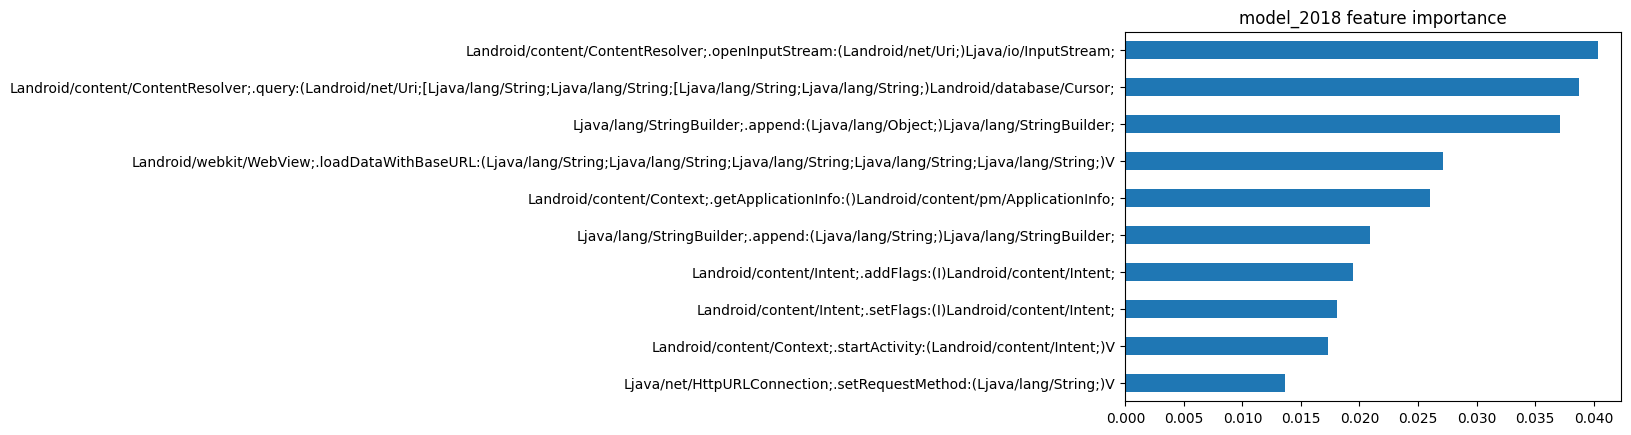

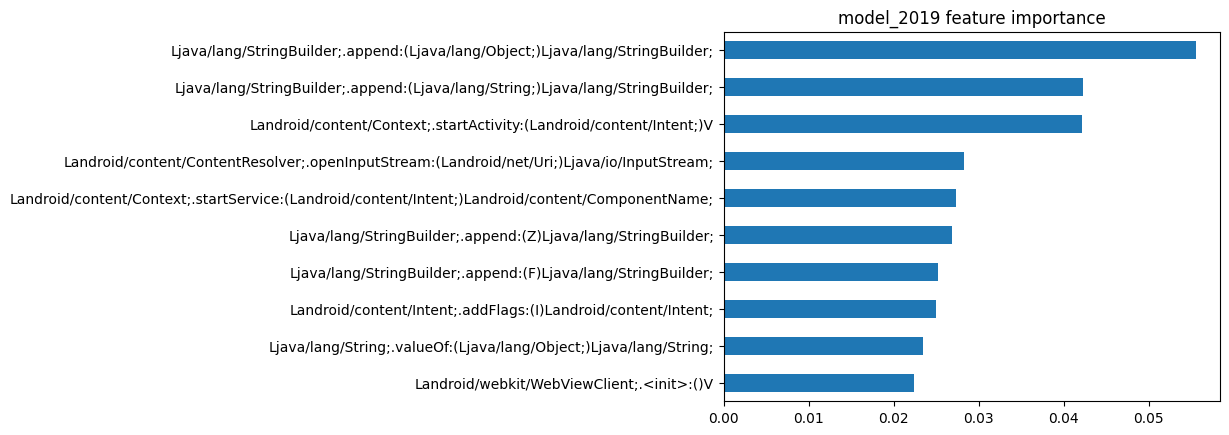

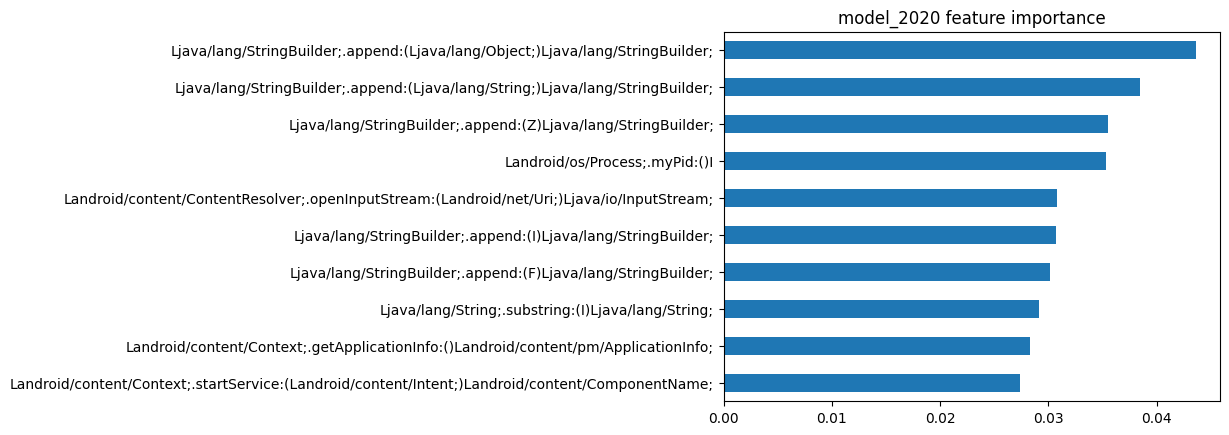

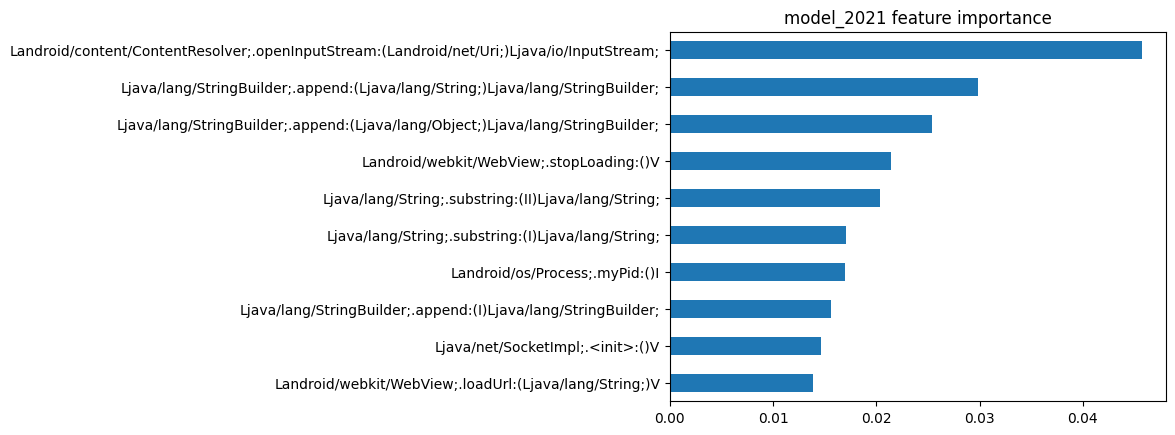

In [7]:
for year in years:
    df = pd.read_csv(f'./feature_importance/feature_importance_{year}.csv', header=None)
    df.columns=dk_api
    fig = plt.figure()
    my_plot = df.T[0].sort_values(ascending=False).iloc[:10].sort_values().plot(kind='barh')
    plt.title(f"model_{year} feature importance")
    plt.savefig(f"./visual/fullname_{year}_importance.png")
    plt.show()

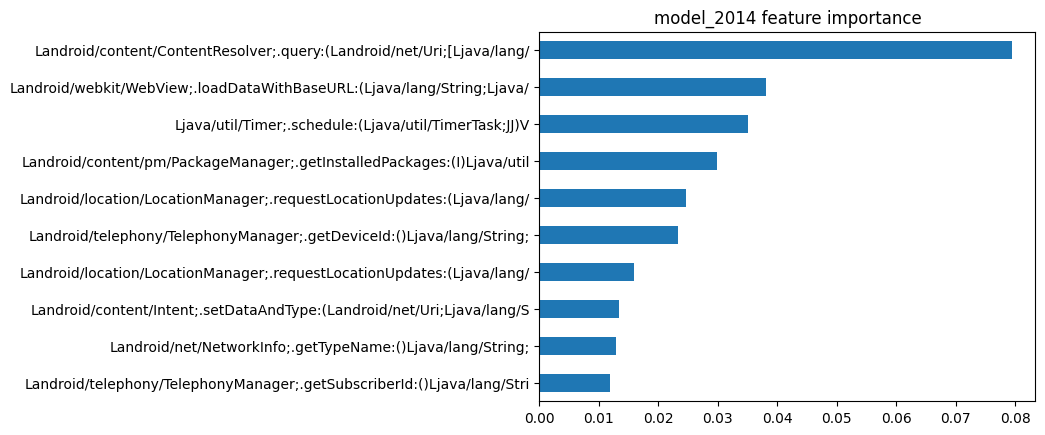

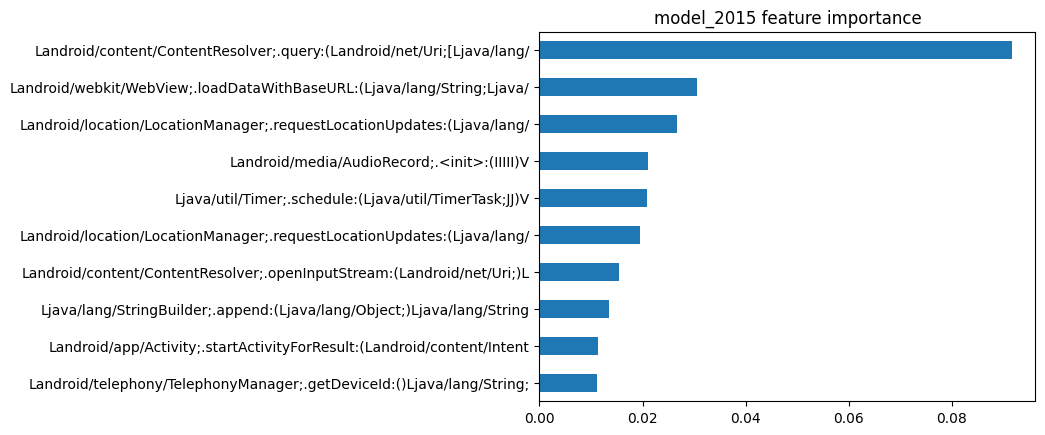

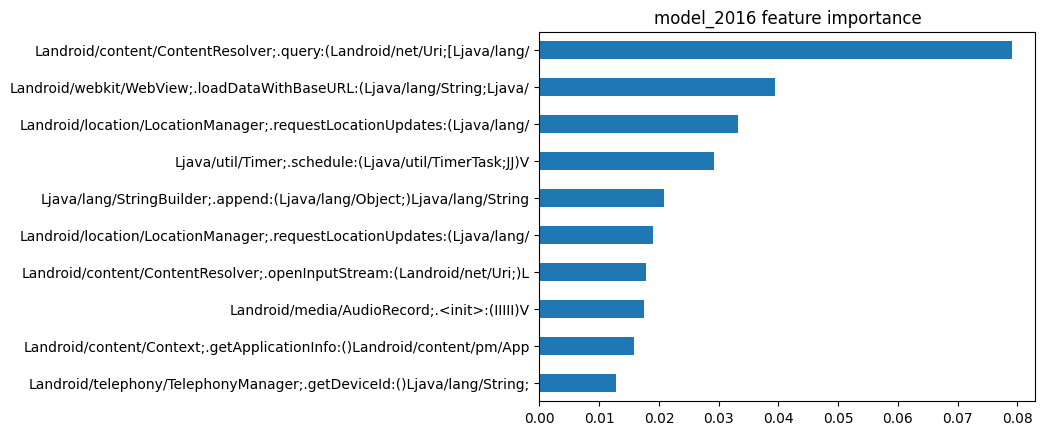

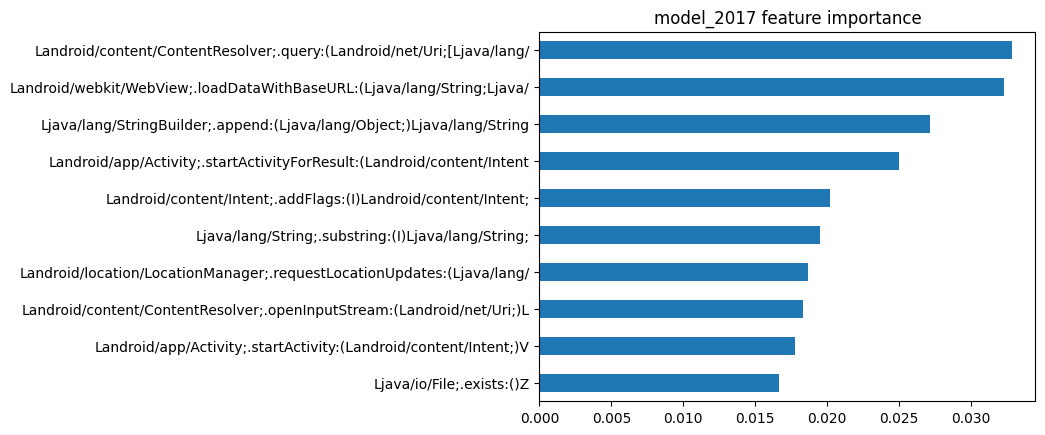

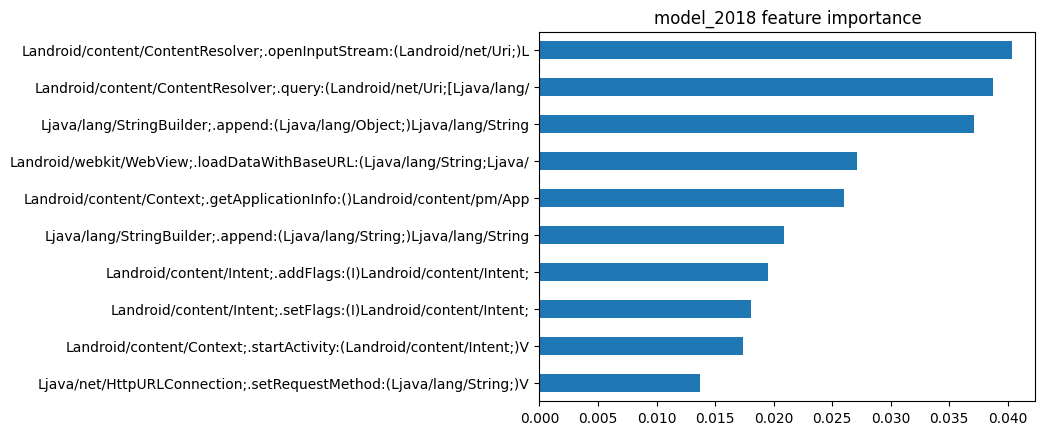

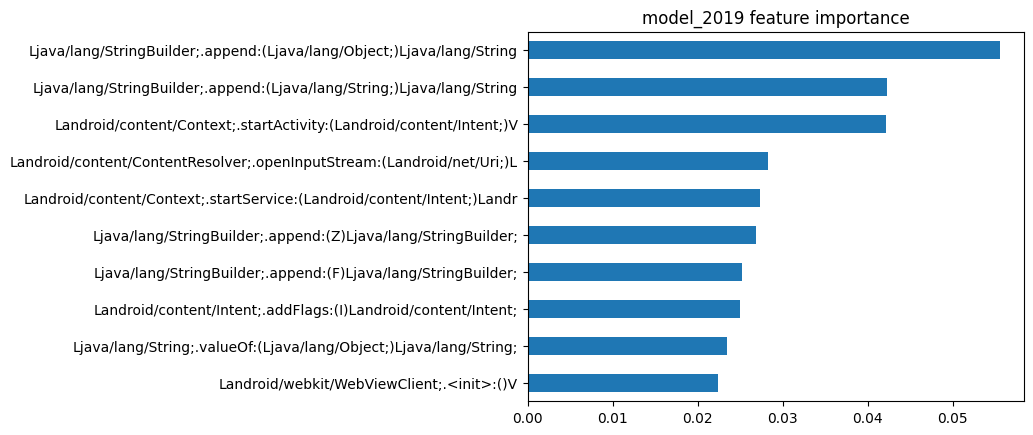

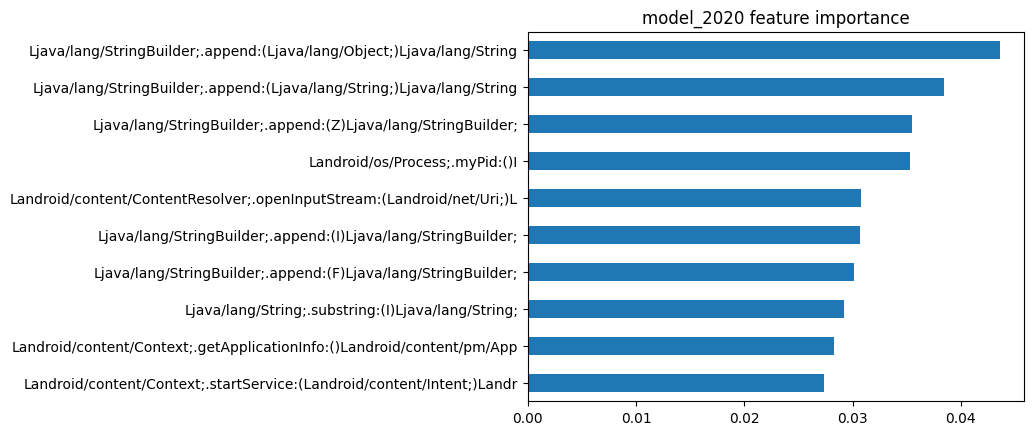

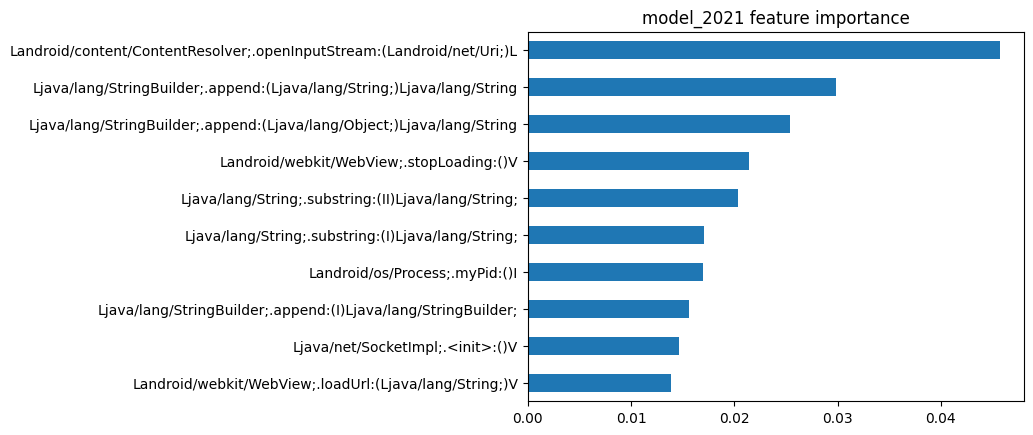

In [8]:
for year in years:
    df = pd.read_csv(f'./feature_importance/feature_importance_{year}.csv', header=None)
    df.columns=short_dk_api
    fig = plt.figure()
    my_plot = df.T[0].sort_values(ascending=False).iloc[:10].sort_values().plot(kind='barh')
    plt.title(f"model_{year} feature importance")
    plt.savefig(f"./visual/{year}_importance.png")
    plt.show()

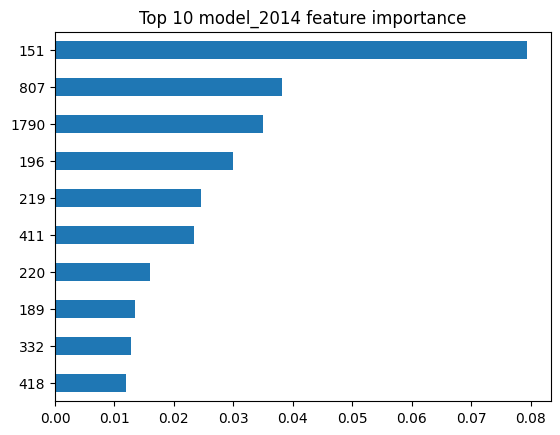

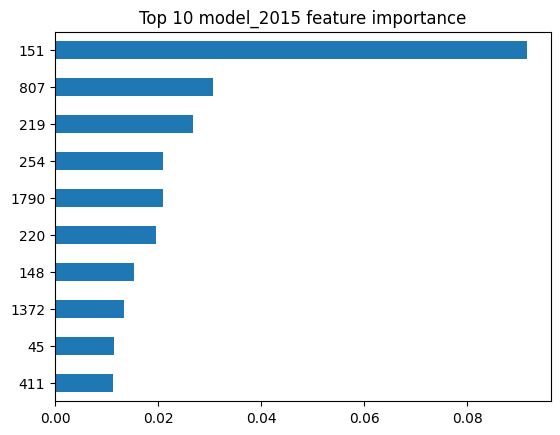

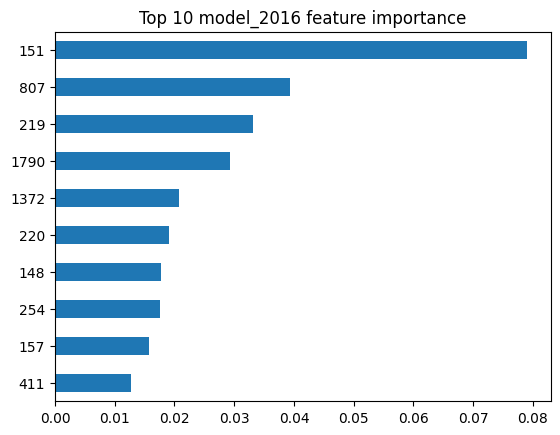

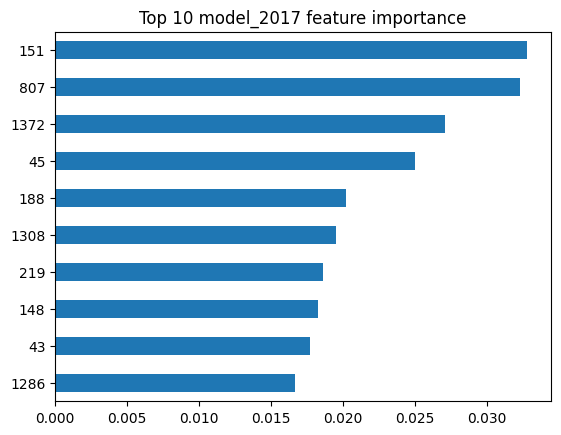

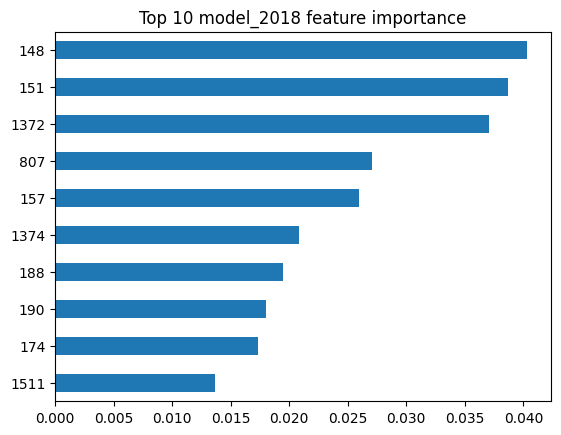

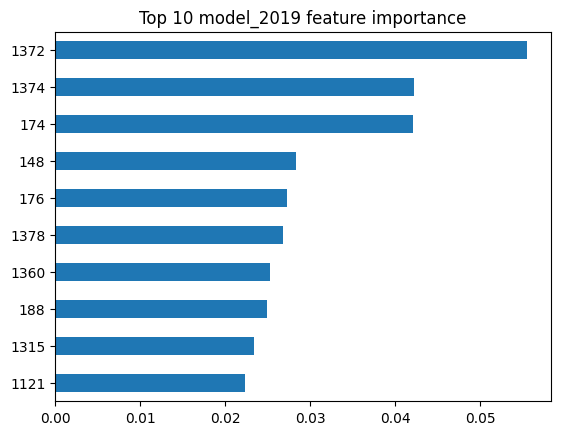

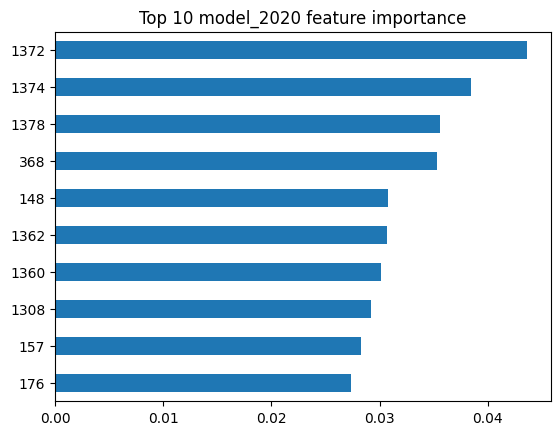

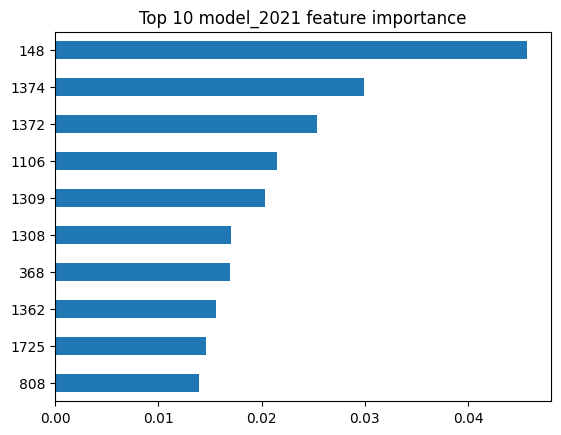

In [9]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')

for year in years:
    df = pd.read_csv(f'./feature_importance/feature_importance_{year}.csv', header=None)
    fig = plt.figure()
    my_plot = df.T[0].sort_values(ascending=False).iloc[:10].sort_values().plot(kind='barh')
    plt.title(f"Top 10 model_{year} feature importance")
    plt.savefig(f"./visual/{year}_importance_index.png")
    plt.show()

# 랭킹 분석

아래 내용은 이해하지 않아도 좋습니다

In [10]:
rank_table =[]
for year in years:
    df = pd.read_csv(f'./feature_importance/feature_importance_{year}.csv', header=None)
    rank = df.T[1].to_list()
    rank_table.append(rank)

In [11]:
limit = 10
candidate_list = []
for rank in rank_table:
    for i, v in enumerate(rank):
        if v <=limit:
            candidate_list.append(i)

In [12]:
result ={}
for candidate in candidate_list:
    temp = [rank[candidate] for rank in rank_table]
    scalar = sum([abs(temp[i+1]-temp[i]) for i in range(len(temp)-1)])
    vector = sum([temp[i+1]-temp[i] for i in range(len(temp)-1)])
    
    speed = scalar/((limit-1)*(len(years)-1))
    velocity = vector/((limit-1)*(len(years)-1))    
    result[str(candidate)]=[velocity, speed, vector/scalar, temp, scalar, vector]

In [13]:
sorted_result = sorted(result.items(), key = lambda item: item[1])

In [14]:
sorted_result

[('1725',
  [-10.857142857142858,
   10.857142857142858,
   -1.0,
   [693.0, 684.0, 311.0, 244.0, 155.0, 78.0, 65.0, 9.0],
   684.0,
   -684.0]),
 ('1106',
  [-1.7936507936507937,
   3.4444444444444446,
   -0.5207373271889401,
   [117.0, 126.0, 137.0, 140.0, 169.0, 138.0, 94.0, 4.0],
   217.0,
   -113.0]),
 ('176',
  [-1.492063492063492,
   2.0634920634920637,
   -0.7230769230769231,
   [116.0, 102.0, 51.0, 52.0, 30.0, 5.0, 10.0, 22.0],
   130.0,
   -94.0]),
 ('368',
  [-1.253968253968254,
   3.253968253968254,
   -0.3853658536585366,
   [86.0, 125.0, 101.0, 122.0, 72.0, 22.0, 4.0, 7.0],
   205.0,
   -79.0]),
 ('1360',
  [-0.9365079365079365,
   3.2857142857142856,
   -0.28502415458937197,
   [80.0, 17.0, 42.0, 16.0, 51.0, 7.0, 7.0, 21.0],
   207.0,
   -59.0]),
 ('190',
  [-0.6031746031746031,
   2.634920634920635,
   -0.2289156626506024,
   [53.0, 49.0, 57.0, 85.0, 8.0, 23.0, 36.0, 15.0],
   166.0,
   -38.0]),
 ('148',
  [-0.5714285714285714,
   0.7301587301587301,
   -0.7826086956521

In [15]:
a=[rank[151] for rank in rank_table]

a, [a[i+1]-a[i] for i in range(len(a)-1)]

([1.0, 1.0, 1.0, 1.0, 2.0, 40.0, 51.0, 30.0],
 [0.0, 0.0, 0.0, 1.0, 38.0, 11.0, -21.0])

In [16]:
a=[rank[151] for rank in rank_table]
print([a[i+1]-a[i] for i in range(len(a)-1)], [abs(a[i+1]-a[i]) for i in range(len(a)-1)])
print(sum([a[i+1]-a[i] for i in range(len(a)-1)]), sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)]))
print(sum([a[i+1]-a[i] for i in range(len(a)-1)])/45, sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)])/45)
print(sum([a[i+1]-a[i] for i in range(len(a)-1)]) / sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)]))
print(sum([a[i+1]-a[i] for i in range(len(a)-1)]) * sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)]))

[0.0, 0.0, 0.0, 1.0, 38.0, 11.0, -21.0] [0.0, 0.0, 0.0, 1.0, 38.0, 11.0, 21.0]
29.0 71.0
0.6444444444444445 1.5777777777777777
0.4084507042253521
2059.0


In [17]:
[rank[1372] for rank in rank_table]

[12.0, 8.0, 5.0, 3.0, 3.0, 1.0, 1.0, 3.0]

In [18]:
a=[rank[1372] for rank in rank_table]
print([a[i+1]-a[i] for i in range(len(a)-1)], [abs(a[i+1]-a[i]) for i in range(len(a)-1)])
print(sum([a[i+1]-a[i] for i in range(len(a)-1)]), sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)]))
print(sum([a[i+1]-a[i] for i in range(len(a)-1)])/45, sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)])/45)
print(sum([a[i+1]-a[i] for i in range(len(a)-1)]) / sum([abs(a[i+1]-a[i]) for i in range(len(a)-1)]))

[-4.0, -3.0, -2.0, 0.0, -2.0, 0.0, 2.0] [4.0, 3.0, 2.0, 0.0, 2.0, 0.0, 2.0]
-9.0 13.0
-0.2 0.28888888888888886
-0.6923076923076923


In [19]:
sum([rank[1372] for rank in rank_table])/6

6.0